In this assignment, you will implement the Metropolis algorithm to sample from a posterior distribution on a psychological parameter, based on data on bcourses.

Assume that a Weber ratio W has prior,
P(W) = e^(-W)

A likelihood function has been provided that compute the probability of answering correctly (the behavioral data) given W and the behavioral stimuli (n1 and n2).

Recall that in the Metropolis-Hastings algorithm, you start with an initial W, you propose a change to a new value W' (e.g. by adding a sample from a Normal(0,.1) distribution to W) and you accept this change always if it is better, and otherwise with probability P(W'|D)/P(W|D). 

NOTE: Please pay attention to which terms do and do not have logs in this assignment

# 1. [5pts] We will implement functions that compute the logarithm of the prior and the logarithm posterior, as opposed to the unlogged versions. Explain why in 1-2 sentences.

When we log(e^(-W)), the log cancels out the e, leaving P(W) = -W.  This simplifies the equation by much allowing us to use a single sum over a complicated product.

# 2. [5pts] Explain in a 1-2 sentences why the form of the acceptance ratio P(W'|D)/P(W|D) is convenient for us – that is, why it saves us from doing an integral.

It allows us to get rid of the denominator, which if kept, would cause us to need to calculate two different integrals (one for each denominator) in order to find P(H|D).

# 3. [5pts] Write functions to compute something proportional to the log prior and log posterior in this model. You will prevent later frustration by ensuring that your prior correctly handles cases when W<0 (what should it return?).

In [13]:
import numpy as np
from math import log, sqrt, exp
import scipy.stats
import pandas as pd
import csv
import math

data = pd.read_csv('Assignment9-data.csv')

def log_likelihood(n1, n2, a, W):
    # this function takes a numpy array for n1, n2, and the accuracy (0/1), whether they answerd correctly
    # as well as W, the hypothesis
    # and returns the *log* likelihood of the responses, log P(acc | n1, n2, W)

    assert(len(n1) == len(n2) == len(a))

    p = 1.0-scipy.stats.norm.cdf(0, loc=np.abs(n1-n2), scale=W*np.sqrt(n1**2 + n2**2)) # the probability of answering correctly
    return np.sum(np.where(a, np.log(p), np.log(1.0-p)))

def log_prior(W):
    if W < 0:
        return 0
    else:
        return log(exp(-W))

def log_posterior(W):
    return proportional_prior(W) + log_likelihood(data['n1'], data['n2'], data['correct'], W)

# 4. [25pts] Implement the Metropolis algorithm, starting from a random W, and plot (a) the posterior score of W over the first 300 samples; (b) the value of W over the first 300 samples, and (c) a histogram of the samples of W over the first 10,000 samples after 1000 samples of “burn in.”

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


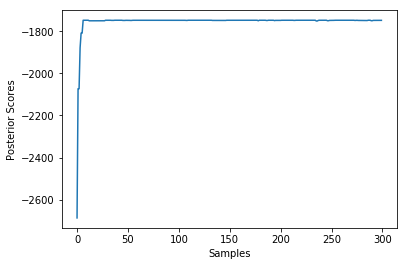

In [41]:
import matplotlib.pyplot as plt

hyp_list = []
x = []
y = []
hyp_list.append(np.random.uniform(0, 1))


for i in range(300):
    x.append(i)
    w = hyp_list[-1]
    nextw = w + np.random.normal(0, 0.1)
    if log_posterior(nextw) > log_posterior(w):
        hyp_list.append(nextw)
        y.append(log_posterior(nextw))
        
    else:
        ratio = exp((log_posterior(nextw))-(log_posterior(w)))
        rand = np.random.uniform(0,1)
        if rand < ratio:
            hyp_list.append(nextw)
            y.append(log_posterior(nextw))
        else:
            hyp_list.append(w)
            y.append(log_posterior(w))
        
plt.xlabel('Samples')
plt.ylabel('Posterior Scores')
plt.plot(x,y)
plt.show()

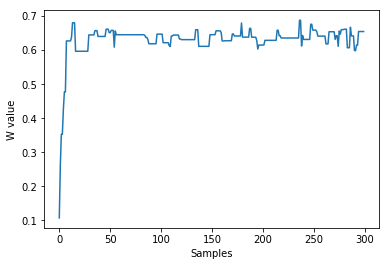

In [45]:
plt.xlabel('Samples')
plt.ylabel('W value')
plt.plot(x, hyp_list[0:300])

(array([  6.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,   0.,   3.,  20.,
          6.,   3.,   0.,  16.,   5.,   7.,  22.,   9.,  29.,  19.,  35.,
         47.,  32.,  46.,  67.,  55.,  83.,  73.,  52., 102., 120.,  87.,
        211., 176., 210., 297., 202., 182., 211., 179., 220., 271., 287.,
        213., 285., 200., 200., 298., 342., 323., 319., 195., 242., 166.,
        233., 243., 152., 195., 177., 131., 199., 209., 167., 149., 158.,
        104.,  83.,  59.,  56.,  70.,  77.,  49.,  31.,  47.,  15.,  36.,
         18.,  19.,  20.,  31.,  15.,   8.,  20.,   8.,  13.,   3.,   4.,
         10.,   0.,   2.,   4.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,
          3.]),
 array([0.56877747, 0.57017323, 0.57156899, 0.57296475, 0.57436051,
        0.57575627, 0.57715203, 0.57854779, 0.57994355, 0.58133932,
        0.58273508, 0.58413084, 0.5855266 , 0.58692236, 0.58831812,
        0.58971388, 0.59110964, 0.5925054 , 0.59390116, 0.59529692,
        0.59669269, 0.59808845, 0.59948421, 0.

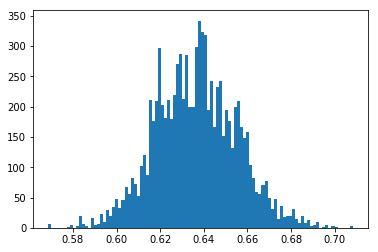

In [48]:
def c_log_posterior(W):
    return proportional_prior(W) + log_likelihood(data['n1'][1001:], data['n2'][1001:], data['correct'][1001:], W)

hyp_list = []
x = []
hyp_list.append(np.random.uniform(0, 1))


for i in range(10000):
    x.append(i)
    w = hyp_list[-1]
    nextw = w + np.random.normal(0, 0.1)
    if log_posterior(nextw) > log_posterior(w):
        hyp_list.append(nextw)
        y.append(log_posterior(nextw))
        
    else:
        ratio = exp((log_posterior(nextw))-(log_posterior(w)))
        rand = np.random.uniform(0,1)
        if rand < ratio:
            hyp_list.append(nextw)
            y.append(log_posterior(nextw))
        else:
            hyp_list.append(w)
            y.append(log_posterior(w))
            
plt.hist(hyp_list[1001:], bins = 100)

# 5. [15pts] Use your sampler to determine the probability that W is in the interval [0.2,0.3]. What is that probability?

In [49]:
def ininterval(data):
    count = 0
    for i in data:
          if i > 0.2 and i < 0.3:
                count += 1
    return count

ininterval(hyp_list)

0

# 6. [25pts] Extra credit: Do you get “better” estimates with this algorithm if you run one chain for 200 steps or two chains for 100 steps each and just concatenate their samples? To answer this, you should come up with both (a) a simulation that tries both of these options (you'll want to run more than one time!) and (b) a measure of how “good” a run was (i.e. how accurate its samples were). 
Write a sentence or two justifying your measure of goodness, create a visualization of the two options, and explain in a sentence how the visualization answers the question.